# LINEAR REGRESSION WITH SINGLE VARIABLE

### Loading data set and plotting data

In [345]:
import numpy as np 
import matplotlib.pyplot as plt

In [346]:
data = np.loadtxt("ex1data1.txt", delimiter=',' )

X, y = np.split(data,[-1],axis=1) #splitting data into x and y

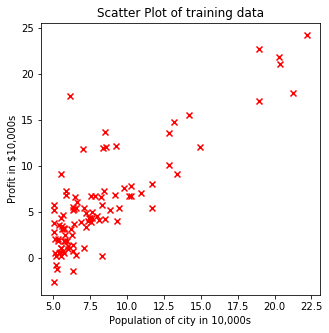

In [348]:
plt.figure(figsize=(5,5))
plt.title('Scatter Plot of training data')
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000s')

plt.scatter(X, y, marker = 'x', c= 'red')
plt.show()

### Defining Equations and training data 

In [349]:
learning_rate = 0.001
iterations = 50

# h(x) = b0 + b1(X)
b0 = float(0)
b1 = float(0)
n = len(X)
cost = []

for i in range(iterations):
    y_predict = b0 + b1 * X
    
    iter_cost = (1/ 2 * n) * sum((y - y_predict) ** 2)
    cost.append(iter_cost)
    
    b0_derivative = (-2/n) * sum(y - y_predict) 
    b1_derivative = (-2/n) * sum(X * (y - y_predict))
    
    # updating b0 and b1
    b0 = b0 - learning_rate * (b0_derivative)
    b1 = b1 - learning_rate * (b1_derivative)

print (b0, b1)

[0.00868771] [0.8006868]


### Plotting Results 

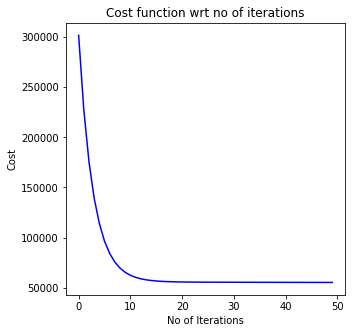

In [350]:
plt.figure(figsize=(5,5))
plt.title('Cost function wrt no of iterations')
plt.xlabel('No of Iterations')
plt.ylabel('Cost')

plt.plot(range(iterations), cost, color='blue')
plt.show()

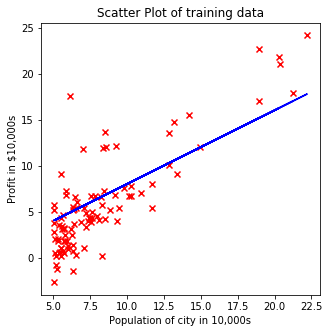

In [351]:
y_predict = b0 + b1 * X

plt.figure(figsize=(5,5))
plt.title('Scatter Plot of training data')
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000s')

plt.scatter(X, y, marker = 'x', c= 'red')
plt.plot(X, y_predict, color='blue')
plt.show()

# LINEAR REGRESSION WITH MULTIPLE VARIABLES 

## Gradient Descent

### Loading data set and feature normalization

In [457]:
import numpy as np 
import matplotlib.pyplot as plt

In [353]:
data = np.loadtxt("ex1data2.txt", delimiter=',' )

X, y = np.split(data,[-1],axis=1) #splitting data into x and y

In [354]:
# calculating mean and standard deviation of each column in X

mean = np.mean(X, axis = 0)  
standard_dev = np.std(X, axis= 0, ddof = 1)

# (X- mean) / standard_dev

updated_X = (X - mean)/standard_dev

# adding 1's at start of X 
updated_X = np.hstack((np.ones((len(updated_X),1)), updated_X))

### Training using Gradient Descent 

In [453]:
learning_rate = 0.15
iterations = 200
m = len(X)
weights = np.zeros(3)
cost = np.zeros(iterations)

for i in range(iterations):
    y_predict = updated_X.dot(weights)
    
    error = y_predict - y
    
    gradient = updated_X.T.dot(error) / m
    weights = weights - learning_rate * gradient[:, :1]
    
    mse = np.square(error)
    cost_func = 1 / (2 * m ) * np.sum(mse)
    cost[i] = cost_func

print(weights[:, :1])

[[340412.68085106]
 [110630.97795041]
 [ -6649.36922302]]


### Plotting Results 

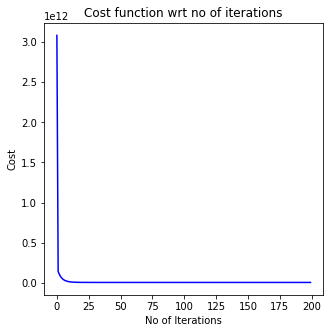

In [454]:
plt.figure(figsize=(5,5))
plt.title('Cost function wrt no of iterations')
plt.xlabel('No of Iterations')
plt.ylabel('Cost')

plt.plot(range(iterations), cost, color='blue')
plt.show()

In [455]:
i = 11
price = updated_X[i].dot(weights)
print("Predicted price: " , price[0])
print("Actual Price: " , y[i])

Predicted price:  341805.1980830379
Actual Price:  [347000.]


## Normal Equation

### Loading data set 

In [458]:
import numpy as np 
import matplotlib.pyplot as plt

In [469]:
data = np.loadtxt("ex1data2.txt", delimiter=',' )

X, y = np.split(data,[-1],axis=1) #splitting data into x and y
X = np.hstack((np.ones((len(X),1)), X))

### Training using normal equation

In [472]:
# transpose 
X_transpose = X.T

# mult X_tranpose with X

X_dot_product = X_transpose.dot(X)

# inverse of product 
X_inverse = np.linalg.inv(X_dot_product)

# Xtranspose * y
X_y_product = X_transpose.dot(y)

# finding weights 
weights = X_inverse.dot(X_y_product)

print(weights)

[[89597.82828238]
 [  139.2106998 ]
 [-8738.00303701]]


In [476]:
i = 11
price = X[i].dot(weights)
print("Predicted price: " , price[0])
print("Actual Price: " , y[i])

# prints same 

Predicted price:  341805.2187638828
Actual Price:  [347000.]
